In [1]:
# REGRESSÃO LINEAR

In [2]:
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #plotting library
import statsmodels.api as sm #statistical models and tests

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.ExcelFile ('/content/drive/My Drive/data/margolis.xlsx')

In [5]:
data.sheet_names

['2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2011-2022',
 'Planilha1']

In [6]:
grimes = pd.read_excel(data, '2011-2022')

In [7]:
pd.set_option ('display.max_rows', 12)

In [8]:
grimes

,ANO,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 5,Destino,Unnamed: 7,TU,TKU
0,ANO,NaN,NaN,NaN,Estação,UF,Estação,UF,NaN,NaN
1,2011,01/2011,EFC,Minério de Ferro,Açailândia,MA,Virador de Vagões Minério,MA,1800.0,9.234000e+05
2,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112.0,4.931245e+07
3,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,120684.0,1.858534e+07
4,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010.0,1.280353e+07
...,...,...,...,...,...,...,...,...,...,...
913,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,33461.0,5.119533e+06
914,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,8306915.0,7.401461e+09
915,2022,12/2022,EFC,Minério de Ferro,Marabá,PA,Ponta da Madeira,MA,22971.0,1.695260e+07
916,2022,12/2022,EFC,Minério de Ferro,Serra Leste,PA,Ponta da Madeira,MA,526014.0,4.372975e+08


In [9]:
## SEPARAÇÃO
grouped = grimes.groupby(['Ferrovia', 'Mercadoria ANTT'])
vsync = grouped.get_group( ('EFC', 'Minério de Ferro') )

In [10]:
vsync

,ANO,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 5,Destino,Unnamed: 7,TU,TKU
1,2011,01/2011,EFC,Minério de Ferro,Açailândia,MA,Virador de Vagões Minério,MA,1800.0,9.234000e+05
2,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112.0,4.931245e+07
3,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,120684.0,1.858534e+07
4,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010.0,1.280353e+07
5,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432.0,8.031953e+09
...,...,...,...,...,...,...,...,...,...,...
913,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,33461.0,5.119533e+06
914,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,8306915.0,7.401461e+09
915,2022,12/2022,EFC,Minério de Ferro,Marabá,PA,Ponta da Madeira,MA,22971.0,1.695260e+07
916,2022,12/2022,EFC,Minério de Ferro,Serra Leste,PA,Ponta da Madeira,MA,526014.0,4.372975e+08


In [11]:
vsync.to_excel('/content/drive/My Drive/data/vsync.xlsx')

In [12]:
vsync

,ANO,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 5,Destino,Unnamed: 7,TU,TKU
1,2011,01/2011,EFC,Minério de Ferro,Açailândia,MA,Virador de Vagões Minério,MA,1800.0,9.234000e+05
2,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112.0,4.931245e+07
3,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,120684.0,1.858534e+07
4,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010.0,1.280353e+07
5,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432.0,8.031953e+09
...,...,...,...,...,...,...,...,...,...,...
913,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,33461.0,5.119533e+06
914,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,8306915.0,7.401461e+09
915,2022,12/2022,EFC,Minério de Ferro,Marabá,PA,Ponta da Madeira,MA,22971.0,1.695260e+07
916,2022,12/2022,EFC,Minério de Ferro,Serra Leste,PA,Ponta da Madeira,MA,526014.0,4.372975e+08


In [14]:
grouped = vsync.groupby(['ANO', 'Ferrovia', 'Mercadoria ANTT', 'TKU'] ).sum()

<ipython-input-14-7e774f0be7af>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = vsync.groupby(['ANO', 'Ferrovia', 'Mercadoria ANTT', 'TKU'] ).sum()


In [15]:
grouped

TU
ANO  Ferrovia Mercadoria ANTT  TKU                    
2011 EFC      Minério de Ferro 2.340000e+04      600.0
                               1.170000e+05     3000.0
                               1.872000e+05     4800.0
                               2.340000e+05     6000.0
                               2.730000e+05     7000.0
...                                                ...
2022 EFC      Minério de Ferro 7.401461e+09  8306915.0
                               7.765421e+09  8715400.0
                               8.065826e+09  9052554.0
                               8.474942e+09  9511719.0
                               8.874933e+09  9960643.0

[886 rows x 1 columns]

In [17]:
grouped = vsync.groupby( ['Ferrovia', 'Mercadoria ANTT'] )
dados = grouped.get_group( ('EFC', 'Minério de Ferro') )

In [18]:
dados

,ANO,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 5,Destino,Unnamed: 7,TU,TKU
1,2011,01/2011,EFC,Minério de Ferro,Açailândia,MA,Virador de Vagões Minério,MA,1800.0,9.234000e+05
2,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112.0,4.931245e+07
3,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,120684.0,1.858534e+07
4,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010.0,1.280353e+07
5,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432.0,8.031953e+09
...,...,...,...,...,...,...,...,...,...,...
913,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,33461.0,5.119533e+06
914,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,8306915.0,7.401461e+09
915,2022,12/2022,EFC,Minério de Ferro,Marabá,PA,Ponta da Madeira,MA,22971.0,1.695260e+07
916,2022,12/2022,EFC,Minério de Ferro,Serra Leste,PA,Ponta da Madeira,MA,526014.0,4.372975e+08


In [19]:
dados.to_excel('/content/drive/My Drive/data/dadosvsync.xlsx')

In [20]:
## Dados do PIB (R$Milhões)
grimes1 = pd.ExcelFile('/content/drive/My Drive/data/dadosvsync.xlsx')
PEFCC = pd.read_excel(grimes1)
grimes2 = pd.ExcelFile('/content/drive/My Drive/data/arizona.xlsx')
PIB= pd.read_excel(grimes2)

In [21]:
## Mesclando dados
PEFCC_PIB = pd.concat([PEFCC,PIB], axis=1)

In [22]:
PEFCC_PIB

,Unnamed: 0,ANO,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 5,Destino,Unnamed: 7,TU,TKU,Data,PIB
0,1,2011,01/2011,EFC,Minério de Ferro,Açailândia,MA,Virador de Vagões Minério,MA,1800,923400,2011.0,4373658.0
1,2,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112,49312448,2012.0,4805913.1
2,3,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,120684,18585336,2013.0,5316455.1
3,4,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010,12803530,2014.0,5687309.0
4,5,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432,8031953344,2015.0,5936677.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,913,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,33461,5119533,NaN,NaN
913,914,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,8306915,7401461265,NaN,NaN
914,915,2022,12/2022,EFC,Minério de Ferro,Marabá,PA,Ponta da Madeira,MA,22971,16952598,NaN,NaN
915,916,2022,12/2022,EFC,Minério de Ferro,Serra Leste,PA,Ponta da Madeira,MA,526014,437297530,NaN,NaN


In [23]:
PEFCC_PIB.to_excel('/content/drive/My Drive/data/PEFCC_PIB.xlsx')

In [24]:
data6 = pd.ExcelFile('/content/drive/My Drive/data/PEFCC_PIB.xlsx')
oblivion = pd.read_excel(data6,index_col=[0])

In [25]:
oblivion

,Unnamed: 0,ANO,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 5,Destino,Unnamed: 7,TU,TKU,Data,PIB
0,1,2011,01/2011,EFC,Minério de Ferro,Açailândia,MA,Virador de Vagões Minério,MA,1800,923400,2011.0,4373658.0
1,2,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112,49312448,2012.0,4805913.1
2,3,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,120684,18585336,2013.0,5316455.1
3,4,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010,12803530,2014.0,5687309.0
4,5,2011,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432,8031953344,2015.0,5936677.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,913,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,33461,5119533,NaN,NaN
913,914,2022,12/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,8306915,7401461265,NaN,NaN
914,915,2022,12/2022,EFC,Minério de Ferro,Marabá,PA,Ponta da Madeira,MA,22971,16952598,NaN,NaN
915,916,2022,12/2022,EFC,Minério de Ferro,Serra Leste,PA,Ponta da Madeira,MA,526014,437297530,NaN,NaN


In [26]:
oblivion.drop( ['Mês/Ano'], axis=1, inplace=True)

In [27]:
oblivion

,Unnamed: 0,ANO,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 5,Destino,Unnamed: 7,TU,TKU,Data,PIB
0,1,2011,EFC,Minério de Ferro,Açailândia,MA,Virador de Vagões Minério,MA,1800,923400,2011.0,4373658.0
1,2,2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112,49312448,2012.0,4805913.1
2,3,2011,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,120684,18585336,2013.0,5316455.1
3,4,2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010,12803530,2014.0,5687309.0
4,5,2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432,8031953344,2015.0,5936677.6
...,...,...,...,...,...,...,...,...,...,...,...,...
912,913,2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,33461,5119533,NaN,NaN
913,914,2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,8306915,7401461265,NaN,NaN
914,915,2022,EFC,Minério de Ferro,Marabá,PA,Ponta da Madeira,MA,22971,16952598,NaN,NaN
915,916,2022,EFC,Minério de Ferro,Serra Leste,PA,Ponta da Madeira,MA,526014,437297530,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

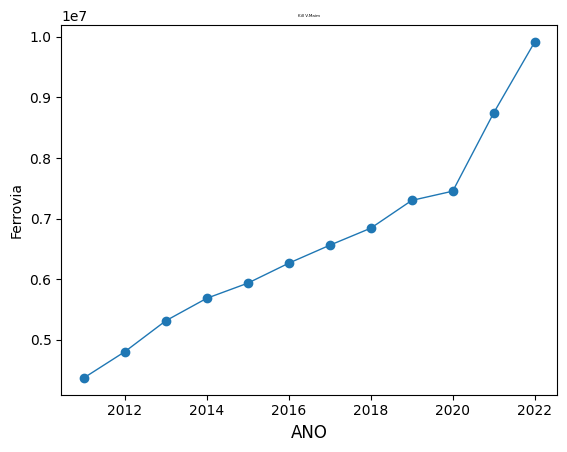

In [43]:
plt.plot(oblivion['Data'], oblivion['PIB'], linewidth='1', linestyle='-', marker='o')
plt.title('Kill V.Maim')
plt.xlabel('ANO', fontsize=12)
plt.ylabel('Ferrovia', fontsize=10)
plt.rc('axes', titlesize=3)
plt.show

In [44]:
## Analíse estatística
pd.set_option('display.float_format', lambda x:'%.2f' % x)
oblivion.describe()

,Unnamed: 0,ANO,TU,TKU,Data,PIB
count,917.00,917.00,917.00,917.00,12.00,12.00
mean,459.00,2016.40,2013990.96,1801386723.47,2016.50,6600694.84
std,264.86,3.52,3741157.52,3377997318.50,3.61,1597873.97
min,1.00,2011.00,200.00,23400.00,2011.00,4373658.00
25%,230.00,2013.00,21200.00,7530552.00,2013.75,5594595.53
50%,459.00,2016.00,67980.00,29061450.00,2016.50,6414226.00
75%,688.00,2019.00,443181.00,370776869.00,2019.25,7339471.00
max,917.00,2022.00,13858719.00,12348118629.00,2022.00,9915316.40


In [45]:
## Correlação Linear
oblivion.corr(method = 'pearson')

<ipython-input-45-434bae2c0e7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  oblivion.corr(method = 'pearson')


,Unnamed: 0,ANO,TU,TKU,Data,PIB
Unnamed: 0,1.00,1.00,0.13,0.13,1.00,0.97
ANO,1.00,1.00,0.12,0.13,NaN,NaN
TU,0.13,0.12,1.00,1.00,0.13,0.14
TKU,0.13,0.13,1.00,1.00,0.13,0.15
Data,1.00,NaN,0.13,0.13,1.00,0.97
PIB,0.97,NaN,0.14,0.15,0.97,1.00


In [53]:
## Variáveis y,x e constante regressão
y = oblivion ['PIB']
xn = oblivion ['Data']
x = sm.add_constant(xn)

In [54]:
## Estimando a Regressão Linear
regression = sm.OLS(y,x)
results = regression.fit()

MissingDataError: ignored